# **Overview Data**

Langkah ini bisa diibaratkan sebagai peta sebelum memulai proses pembersihkan dan pemahaman data. Overview data merupakan langkah yang sangat krusial untuk memberikan gambaran umum tentang kondisi data kita.

**Dataset**

Dalam menyelesaikan permasalahan tersebut, perlu dianalisa terlebih dahulu data penjualan di bawah.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, shapiro

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/SaaS-Sales.csv')
display(data.head(),data.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


**Deskripsi Data**

Data di atas merupakan hasil dari penjualan perusahaan *Amazon Web Service* (AWS) khususnya pada bidang *Software as a Service* (SaaS) untuk segmen konsumen *business to business* (B2B).

Detail untuk setiap kolomnya terdapat pada penjelasan di bawah:


1.   Row ID : Data unik untuk setiap transaksi
2.   Order ID : Data unik untuk setiap pesanan
3.   Order Date : Tanggal saat pesanan dilakukan
4.   Date Key : Representasi numerik dari tanggal pemesanan (YYYYMMDD)
5.   Contact Name : Nama orang yang memesan
6.   Country : Negara tempat pesanan dilakukan
7.   City : Kota tempat pesanan dilakukan
8.   Region : Wilayah tempat pesanan dilakukan
9.   Subregion : Sub-wilayah tempat pesanan dilakukan
10.   Customer : Nama perusahaan yang melakukan pemesanan
11.   Customer ID : Data unik untuk setiap pelanggan
12.   Industry : Industri tempat pelanggan berada
13.   Segment : Pembagian jenis pelanggan (SMB, Strategic, Enterprise, dan lainnya)
14.   Product : Produk yang dibeli
15.   License : Kode lisensi untuk produk yang dibeli
16.   Sales : Total penjualan dalam setiap transaksi
17.   Quantity : Total barang terjual dalam setiap transaksi
18.   Discount : Diskon yang diberikan pada transaksi
19.   Profit : Keuntungan dalam setiap transaksi

# **Pemahaman dan Pembersihan Data**

Sebagai langkah awal dalam proses analisis data, pemahaman mendalam terhadap karakteristik dataset mutlak diperlukan. Proses ini bertujuan untuk mengidentifikasi anomali atau ketidakkonsistenan dalam data yang perlu ditangani pada tahap pembersihan data.

Pertama-tama, mari kita eksplorasi gambaran umum dari dataset ini.

**Pengecekan Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [ ]:
display(data.describe())

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.describe(include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Outlier
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994,3
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K,Tidak Ada Outlier
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1,7143


Dari paparan data pada tabel di atas, dapat diperoleh beberapa temuan penting:

1.   Seluruh data penjualan AWS memiliki total 19 kolom dan 9.994 baris.
2.   Terdapat 7 data jenis kuantitatif:
* Row ID
* Date Key
* Customer ID
* Quantity
* Sales
* Discount
* Profit
3.   Terdapat 12 data jenis kualitatif:
* Order ID
* Order Date
* Contact Name
* Country
* City
* Region
* Subregion
* Customer
* Industry
* Segment
* Product
* License

**Pengecekan Data Missing**

In [ ]:
data.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Date Key,0
Contact Name,0
Country,0
City,0
Region,0
Subregion,0
Customer,0


Berdasarkan hasil pemeriksaan, tidak terdapat data yang hilang atau *missing value*.

**Pengecekan Data Duplicate**

In [ ]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].nunique(), data[col].unique()])

saassales = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Data Unique', 'Data Unique'], data=listItem)

saassales

,Nama Kolom,Jumlah Data Unique,Data Unique
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


In [ ]:
data.duplicated().sum()

0


Berdasarkan hasil pemeriksaan, tidak terdapat data yang tersalin atau *duplicate*.

Setelah dilakukan pembersihan data dari nilai yang hilang dan duplikasi, langkah selanjutnya adalah deteksi *outlier* untuk meningkatkan akurasi hasil analisis.

**Perubahan Format Tanggal**

Format tanggal telah dioptimalkan untuk mendukung analisis data berdasarkan periode waktu tertentu kedepannya.

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')

In [ ]:
print(data['Order Date'])

0      2022-11-09
1      2022-11-09
2      2022-06-13
3      2021-10-11
4      2021-10-11
          ...    
9989   2020-01-22
9990   2023-02-27
9991   2023-02-27
9992   2023-02-27
9993   2023-05-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]


Setelah dilakukan normalisasi format data, atribut "Tahun" dan "Bulan" diekstrak untuk membatasi ruang lingkup analisis periode waktu.

In [ ]:
data['Tahun'] = data['Order Date'].dt.strftime('%Y').astype(str)
data['Tahun_Bulan'] = data['Order Date'].dt.to_period('M')
data['Tahun_Bulan'] = data['Tahun_Bulan'].astype(str)

In [ ]:
print(data['Tahun_Bulan'])

0       2022-11
1       2022-11
2       2022-06
3       2021-10
4       2021-10
         ...   
9989    2020-01
9990    2023-02
9991    2023-02
9992    2023-02
9993    2023-05
Name: Tahun_Bulan, Length: 9994, dtype: object


**Pengecekan Data Outlier**

Analisis *outlier* akan difokuskan pada variabel numerik dalam dataset:
1.   `Sales`
2.   `Discount`
3.   `Profit`
4.   `Quantity`



<Axes: xlabel='Sales'>

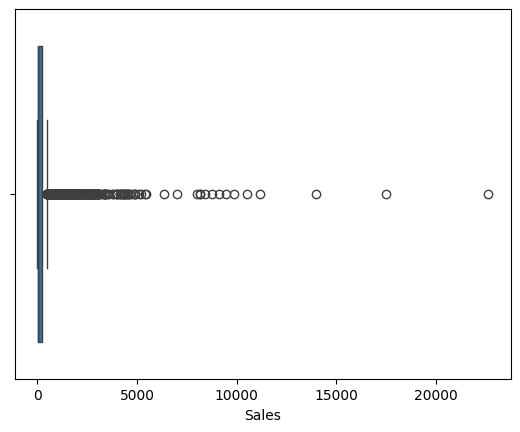

In [ ]:
sns.boxplot(x=data['Sales'])

<Axes: xlabel='Discount'>

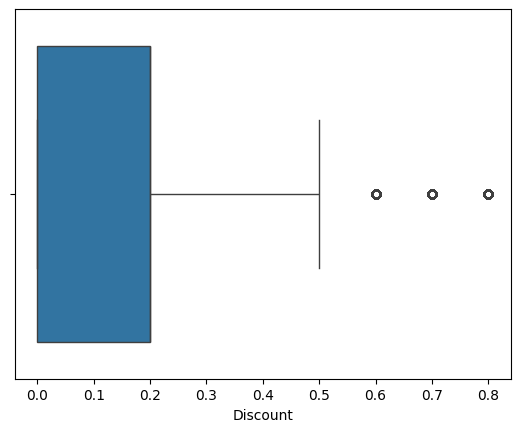

In [ ]:
sns.boxplot(x=data['Discount'])

<Axes: xlabel='Profit'>

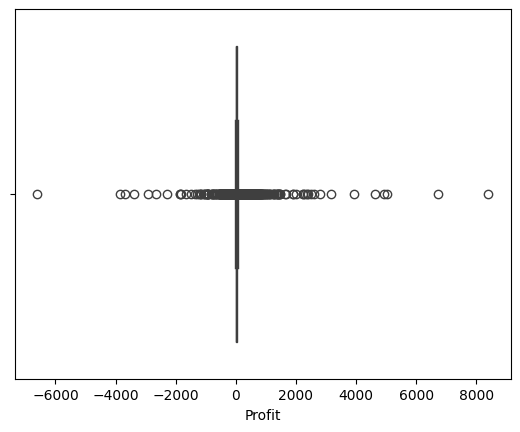

In [ ]:
sns.boxplot(x=data['Profit'])

<Axes: xlabel='Quantity'>

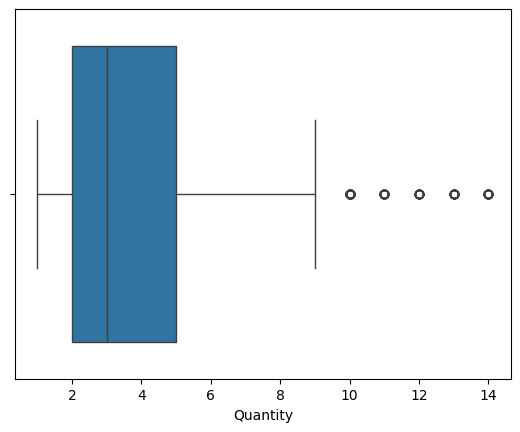

In [ ]:
sns.boxplot(x=data['Quantity'])

Secara lebih spesifik, kita dapat mengimplementasikan metode-metode berikut ini.

Langkah awal yang dilakukan adalah menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan jangkauan interkuartil (IQR).

In [ ]:
numerical = ['Sales', 'Discount', 'Profit', 'Quantity']

num_outlier = data[numerical]
Q1 = num_outlier[['Sales', 'Discount', 'Profit', 'Quantity']].quantile(0.25)
Q3 = num_outlier[['Sales', 'Discount', 'Profit', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

Sales       17.28000
Discount     0.00000
Profit       1.72875
Quantity     2.00000
Name: 0.25, dtype: float64
Sales       209.940
Discount      0.200
Profit       29.364
Quantity      5.000
Name: 0.75, dtype: float64
Sales       192.66000
Discount      0.20000
Profit       27.63525
Quantity      3.00000
dtype: float64


Selanjutnya, tentukan batas bawah dan batas atas dari data.

In [ ]:
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print(batas_bawah)
print(batas_atas)

Sales      -271.710000
Discount     -0.300000
Profit      -39.724125
Quantity     -2.500000
dtype: float64
Sales       498.930000
Discount      0.500000
Profit       70.816875
Quantity      9.500000
dtype: float64


Langkah berikutnya adalah mendeteksi nilai *outlier* negatif dan positif pada masing-masing data.

In [ ]:
negatif = (data[['Sales', 'Discount', 'Profit', 'Quantity']] < batas_bawah).any(axis=1)
positif = (data[['Sales', 'Discount', 'Profit', 'Quantity']] > batas_atas).any(axis=1)

data['Outlier'] = 'Tidak Ada Outlier'
data.loc[negatif, 'Outlier'] = 'Outlier Negatif'
data.loc[positif, 'Outlier'] = 'Outlier Positif'

*Outlier* yang teridentifikasi akan dikelompokkan berdasarkan kategori `Product` dan dinyatakan dalam bentuk persentase sebagai persiapan untuk tahap visualisasi.

In [ ]:
outlier_product = data.groupby(['Product', 'Outlier']).size().unstack(fill_value=0)
outlier_product_percent = outlier_product.div(outlier_product.sum(axis=1), axis=0) * 100

outlier_product_percent

Outlier,Outlier Negatif,Outlier Positif,Tidak Ada Outlier
Product,,,
Alchemy,0.000000,95.588235,4.411765
Big Ol Database,2.608696,81.739130,15.652174
ChatBot Plugin,0.000000,2.135678,97.864322
ContactMatcher,4.180239,48.262758,47.557003
Data Smasher,0.387097,22.064516,77.548387
FinanceHub,4.077472,27.726809,68.195719
Marketing Suite,12.719298,37.719298,49.561404
Marketing Suite - Gold,3.900709,21.394799,74.704492
OneView,0.000000,36.480687,63.519313


Berdasarkan analisis *outlier*, ditemukan temuan menarik sebagai berikut:

1.   Adanya *outlier* negatif mengindikasikan bahwa terdapat penjualan yang jauh di bawah rata-rata penjualan produk lainnya.
2.   Ditemukannya *outlier* negatif yang cukup besar pada produk `Marketing Suite` mengindikasikan adanya penurunan penjualan yang tidak diharapkan dalam rentang waktu tersebut.
3.   Keberadaan *outlier* positif menunjukkan adanya penjualan yang secara signifikan lebih tinggi dibandingkan dengan penjualan umumnya.
4.   Produk `Alchemy` dan `Big Ol Database` mencatat lonjakan penjualan yang signifikan, ditandai dengan adanya *outlier* positif yang sangat besar pada periode tertentu.
5.   Semakin sedikit kategori produk yang memiliki *outlier*, semakin stabil pula kinerja penjualannya
6.   Tidak adanya *outlier* yang signifikan pada produk `ChatBot Plugin`, `Storage`, dan `Support` mengindikasikan stabilitas kinerja produk-produk tersebut.

**Pengecekan Distribusi Data**

Analisis distribusi data memungkinkan kita untuk mengidentifikasi outlier, skewness, dan kurtosis, sehingga dapat membuat keputusan bisnis yang lebih *data-driven* guna mengambil keputusan bisnis yang lebih akurat.

1.   Distribusi Data `Sales`

Shapiro-Wilk Test:
Statistic: 0.32332715724629535
P-value: 4.065053524283138e-105


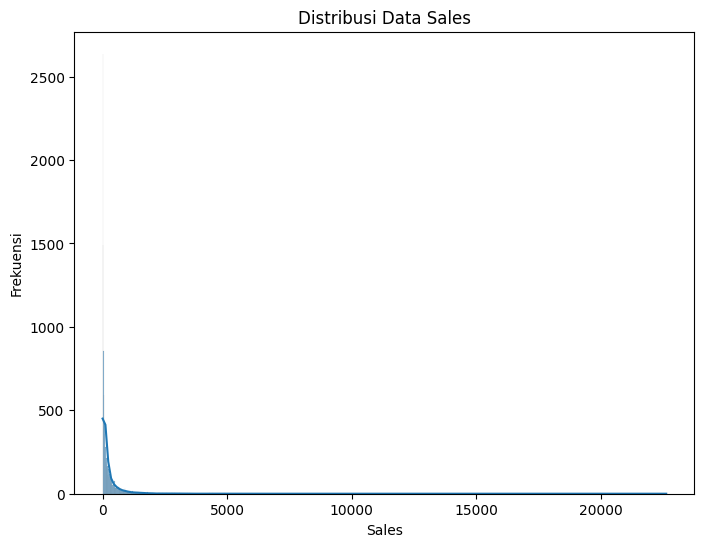

Data 'Sales' tidak berdistribusi normal.


In [ ]:
# Cek distribusi data 'Sales' dengan Shapiro-Wilk test
statistic, p_value = shapiro(data['Sales'])
print(f"Shapiro-Wilk Test:\nStatistic: {statistic}\nP-value: {p_value}")

# Tampilkan histogram untuk visualisasi distribusi data 'Sales'
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], kde=True)
plt.title("Distribusi Data Sales")
plt.xlabel("Sales")
plt.ylabel("Frekuensi")
plt.show()

# Interpretasi hasil Shapiro-Wilk Test
if p_value > 0.05:
    print("Data 'Sales' berdistribusi normal.")
else:
    print("Data 'Sales' tidak berdistribusi normal.")

Distribusi penjualan menunjukkan puncak yang signifikan pada rentang harga di bawah $500.

2.   Distribusi Data `Discount`

Shapiro-Wilk Test:
Statistic: 0.7107060506949305
P-value: 1.030847481822623e-84


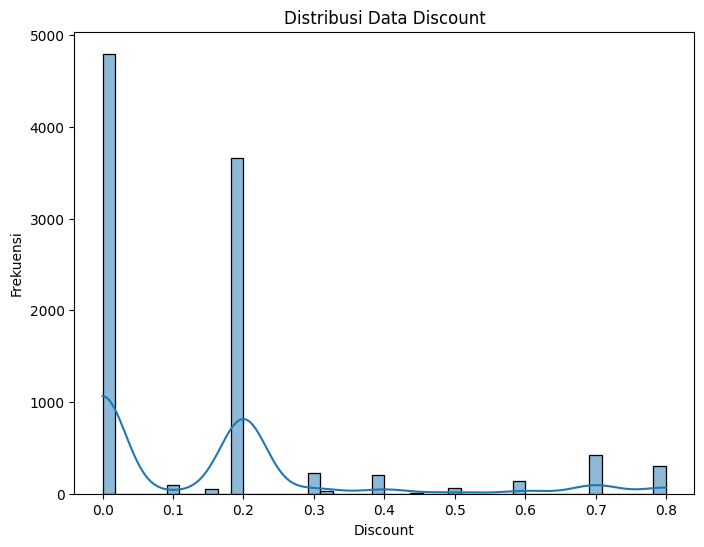

Data 'Discount' tidak berdistribusi normal.


In [ ]:
# Cek distribusi data 'Discount' dengan Shapiro-Wilk test
statistic, p_value = shapiro(data['Discount'])
print(f"Shapiro-Wilk Test:\nStatistic: {statistic}\nP-value: {p_value}")

# Tampilkan histogram untuk visualisasi distribusi data 'Discount'
plt.figure(figsize=(8, 6))
sns.histplot(data['Discount'], kde=True)
plt.title("Distribusi Data Discount")
plt.xlabel("Discount")
plt.ylabel("Frekuensi")
plt.show()

# Interpretasi hasil Shapiro-Wilk Test
if p_value > 0.05:
    print("Data 'Discount' berdistribusi normal.")
else:
    print("Data 'Discount' tidak berdistribusi normal.")

Berdasarkan grafik distribusi `Discount`, dapat disimpulkan bahwa sebagian besar diskon yang diberikan memiliki besaran 20%.

3.   Distribusi Data `Profit`

Shapiro-Wilk Test:
Statistic: 0.25709707779832647
P-value: 1.6987856431860357e-107


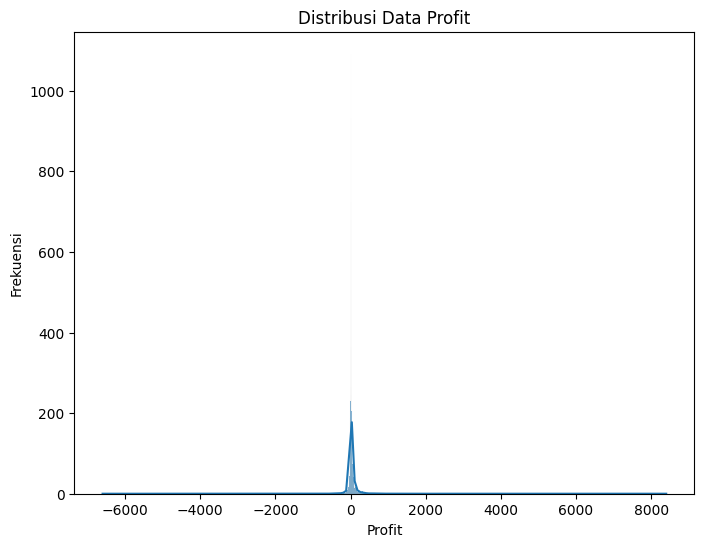

Data 'Profit' tidak berdistribusi normal.


In [ ]:
# Cek distribusi data 'Profit' dengan Shapiro-Wilk test
statistic, p_value = shapiro(data['Profit'])
print(f"Shapiro-Wilk Test:\nStatistic: {statistic}\nP-value: {p_value}")

# Tampilkan histogram untuk visualisasi distribusi data 'Profit'
plt.figure(figsize=(8, 6))
sns.histplot(data['Profit'], kde=True)
plt.title("Distribusi Data Profit")
plt.xlabel("Profit")
plt.ylabel("Frekuensi")
plt.show()

# Interpretasi hasil Shapiro-Wilk Test
if p_value > 0.05:
    print("Data 'Profit' berdistribusi normal.")
else:
    print("Data 'Profit' tidak berdistribusi normal.")

Besarnya keuntungan yang diperoleh dari setiap transaksi sangat rendah, menunjukkan adanya potensi evaluasi dalam efisiensi operasional dan margin keuntungan.

4.   Distribusi Data `Quantity`

Shapiro-Wilk Test:
Statistic: 0.88239102820559
P-value: 1.5185663017552264e-65


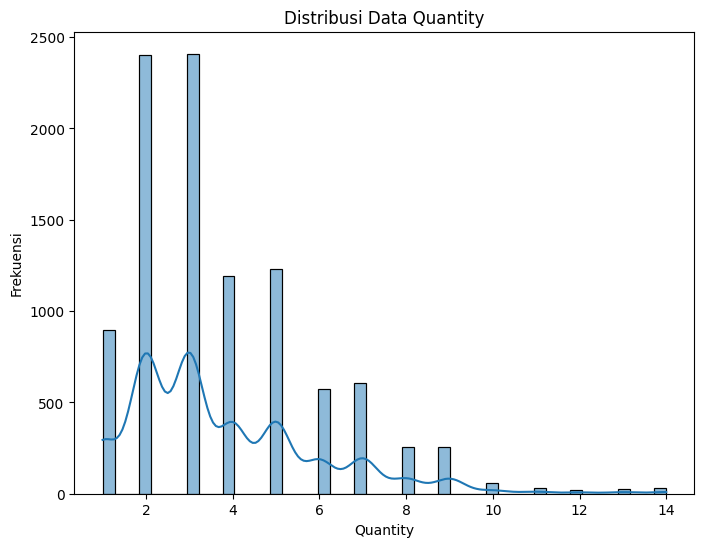

Data 'Quantity' tidak berdistribusi normal.


In [ ]:
# Cek distribusi data 'Quantity' dengan Shapiro-Wilk test
statistic, p_value = shapiro(data['Quantity'])
print(f"Shapiro-Wilk Test:\nStatistic: {statistic}\nP-value: {p_value}")

# Tampilkan histogram untuk visualisasi distribusi data 'Quantity'
plt.figure(figsize=(8, 6))
sns.histplot(data['Quantity'], kde=True)
plt.title("Distribusi Data Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frekuensi")
plt.show()

# Interpretasi hasil Shapiro-Wilk Test
if p_value > 0.05:
    print("Data 'Quantity' berdistribusi normal.")
else:
    print("Data 'Quantity' tidak berdistribusi normal.")

Jumlah produk yang terjual dalam setiap transaksi bervariasi antara 1 hingga 14 produk. Frekuensi penjualan tertinggi tercatat pada transaksi dengan kuantitas 2 dan 3 produk.

# **Analisis Segmentasi Penjualan**

Melalui analisis segmentasi, kita dapat menentukan segmen pasar yang paling sesuai dengan penawaran produk atau jasa kita, sehingga kita dapat mengalokasikan sumber daya pemasaran secara lebih efektif dan meningkatkan *return on investment* (ROI).

Analisis segmentasi penjualan dikategorikan menjadi beberapa kelompok sebagai berikut:
1.   Segmentasi demografi
2.   Segmentasi industri
3.   Segmentasi jenis *customer*
4.   Segmentasi pelanggan



**Segmentasi Demografi**

Analisis ini bertujuan untuk mengevaluasi total penjualan / `Sales` di masing-masing negara.

In [ ]:
country_sales = data.groupby('Country')['Sales'].sum().sort_index()

country_sales

,Sales
Country,
Argentina,35764.3120
Australia,80166.1010
Austria,2865.0200
Belgium,17431.1500
Brazil,76269.6140
Canada,138641.2700
Chile,35282.0010
China,23705.5230
Colombia,8481.7100


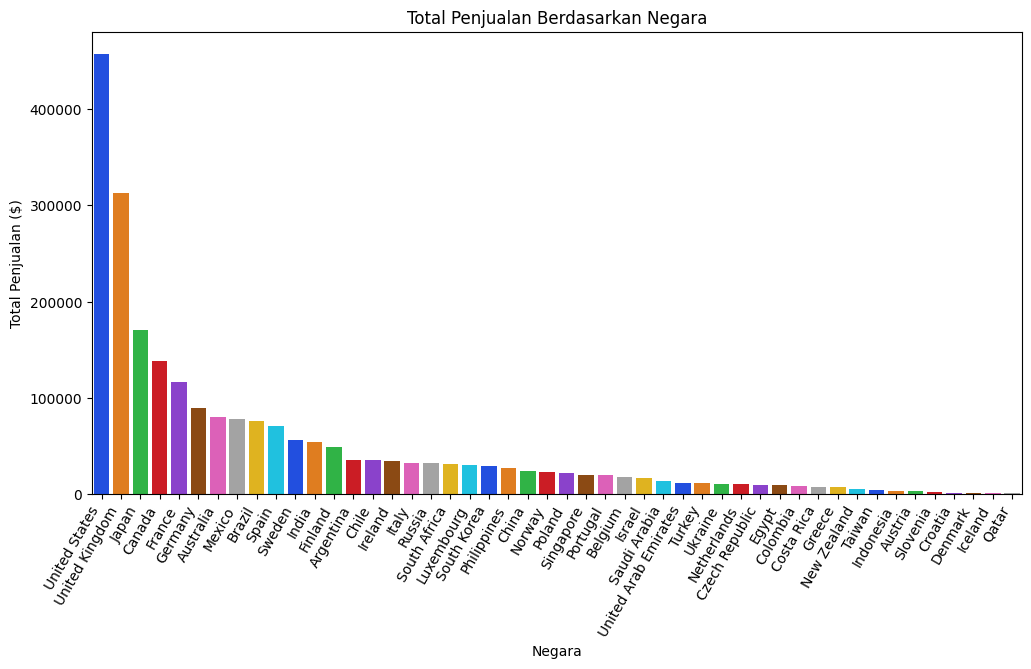

In [ ]:
# Group by 'Country' dan total 'Sales'
country_sales = data.groupby('Country')['Sales'].sum().sort_values(ascending=False)

# Tampilkan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='bright')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Negara')
plt.ylabel('Total Penjualan ($)')
plt.title('Total Penjualan Berdasarkan Negara')
plt.show()

In [20]:
import plotly.express as px

# Group by 'Country' dan total 'Sales'
country_sales = data.groupby('Country')['Sales'].sum().reset_index()

# Tampilkan heatmap dengan Plotly Express
fig = px.choropleth(country_sales, locations="Country", locationmode="country names",
                    color="Sales", hover_name="Country",
                    title="Total Penjualan Berdasarkan Negara",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

Dari seluruh negara yang berkontribusi pada penjualan produk, kita urutkan berdasarkan tiga terbesar dan terkecil. Dengan demikian, kita dapat fokus pada pasar-pasar utama dan mengembangkan strategi yang lebih efektif untuk meningkatkan penjualan.

In [ ]:
top_3_countries_sales = data.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(3)
top_3_countries_sales

,Sales
Country,
United States,457687.6315
United Kingdom,313169.8810
Japan,170188.0458


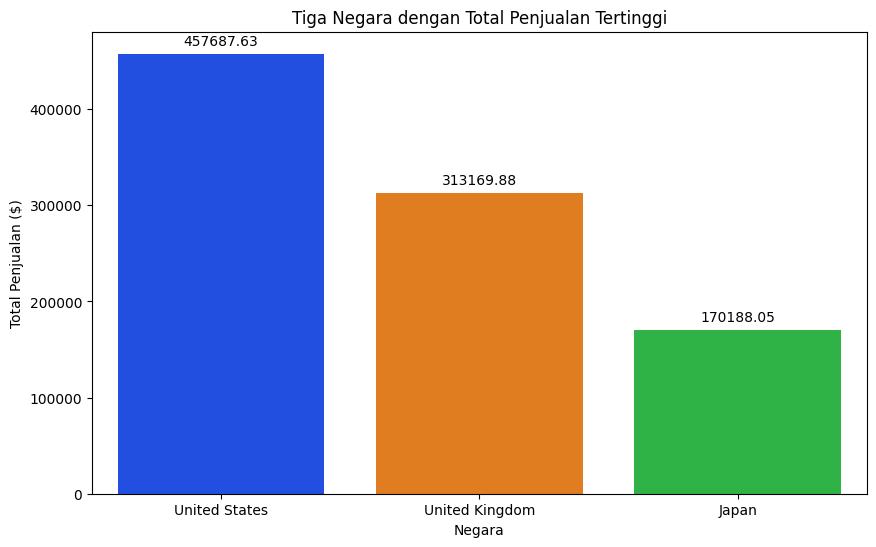

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_3_countries_sales.index, y=top_3_countries_sales.values, palette='bright')
plt.title('Tiga Negara dengan Total Penjualan Tertinggi')
plt.xlabel('Negara')
plt.ylabel('Total Penjualan ($)')

# Menampilkan nominal di atas bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

In [ ]:
bottom_3_countries_sales = data.groupby('Country')['Sales'].sum().sort_values(ascending=True).head(3)
bottom_3_countries_sales

,Sales
Country,
Qatar,919.910
Iceland,1209.824
Denmark,1270.530


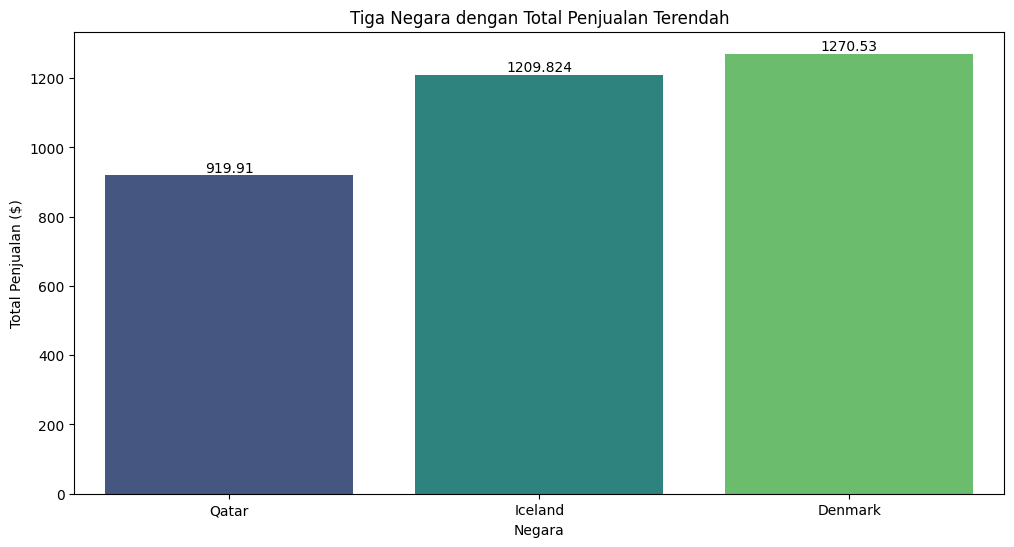

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_3_countries_sales.index, y=bottom_3_countries_sales.values, palette='viridis')
plt.xlabel('Negara')
plt.ylabel('Total Penjualan ($)')
plt.title('Tiga Negara dengan Total Penjualan Terendah')

# Menampilkan nominal penjualan di atas setiap bar
for index, value in enumerate(bottom_3_countries_sales.values):
  plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Selain menganalisis negara dengan volume penjualan tertinggi dan terendah, perlu dilakukan identifikasi produk dengan kinerja penjualan terbaik dan terburuk di masing-masing negara tersebut.

Tiga produk yang memiliki total penjualan terbesar di United States.

In [ ]:
# Filter data untuk United States
us_data = data[data['Country'] == 'United States']

# Group by 'Product' dan sum 'Sales'
product_sales_us = us_data.groupby('Product')['Sales'].sum()

# Sort by 'Sales' dalam urutan menurun
top_3_products_us = product_sales_us.sort_values(ascending=False).head(3)

top_3_products_us

,Sales
Product,
ContactMatcher,73903.400
Site Analytics,67964.536
FinanceHub,65978.508


Tiga produk yang memiliki total penjualan terendah di United States.

In [ ]:
# Filter data untuk United States
us_data = data[data['Country'] == 'United States']

# Group by 'Product' dan sum 'Sales'
product_sales_us = us_data.groupby('Product')['Sales'].sum()

# Sort by 'Sales' dalam urutan menaik
top_3_products_us = product_sales_us.sort_values(ascending=True).head(3)

top_3_products_us

,Sales
Product,
Storage,479.53
SaaS Connector Pack - Gold,3237.34
ChatBot Plugin,5495.66


Tiga produk yang memiliki total penjualan terbesar di United Kingdom.

In [ ]:
# Filter data untuk United Kingdom
uk_data = data[data['Country'] == 'United Kingdom']

# Group by 'Product' dan sum 'Sales'
product_sales_uk = uk_data.groupby('Product')['Sales'].sum()

# Sort by 'Sales' dalam urutan menurun
top_3_products_uk = product_sales_uk.sort_values(ascending=False).head(3)

top_3_products_uk

,Sales
Product,
FinanceHub,47930.577
Site Analytics,47502.620
ContactMatcher,46396.570


Tiga produk yang memiliki total penjualan terendah di United Kingdom.

In [ ]:
# Filter data untuk United Kingdom
uk_data = data[data['Country'] == 'United Kingdom']

# Group by 'Product' dan sum 'Sales'
product_sales_uk = uk_data.groupby('Product')['Sales'].sum()

# Sort by 'Sales' dalam urutan menaik
top_3_products_uk = product_sales_uk.sort_values(ascending=True).head(3)

top_3_products_uk

,Sales
Product,
Storage,286.51
SaaS Connector Pack - Gold,1776.83
ChatBot Plugin,2983.60


Tiga produk yang memiliki total penjualan terbesar di Jepang.

In [ ]:
# Filter data untuk Jepang
jpn_data = data[data['Country'] == 'Japan']

# Group by 'Product' dan sum 'Sales'
product_sales_jpn = jpn_data.groupby('Product')['Sales'].sum()

# Sort by 'Sales' dalam urutan menurun
top_3_products_jpn = product_sales_jpn.sort_values(ascending=False).head(3)

top_3_products_jpn

,Sales
Product,
Site Analytics,28589.568
FinanceHub,27156.048
ContactMatcher,24803.337


Tiga produk yang memiliki total penjualan terbesar di Jepang.

In [ ]:
# Filter data untuk Jepang
jpn_data = data[data['Country'] == 'Japan']

# Group by 'Product' dan sum 'Sales'
product_sales_jpn = jpn_data.groupby('Product')['Sales'].sum()

# Sort by 'Sales' dalam urutan menaik
top_3_products_jpn = product_sales_jpn.sort_values(ascending=True).head(3)

top_3_products_jpn

,Sales
Product,
Storage,332.464
ChatBot Plugin,2369.528
OneView,2407.814


Analisis akan dilanjutkan dengan meneliti kinerja pada tingkat kota. Dengan demikian kita dapat mengidentifikasi kota-kota dengan potensi pertumbuhan tertinggi maupun terendah untuk memaksimalkan hasil penjualan.

Kota dengan volume penjualan tertinggi dan terendah di United States.

In [ ]:
# Filter data untuk United States
us_data = data[data['Country'] == 'United States']

# Kelompokkan berdasarkan 'City' dan jumlahkan 'Sales'
city_sales = us_data.groupby('City')['Sales'].sum()

# Tampilkan 'City' dengan 'Sales' tertinggi
city_with_highest_sales = city_sales.idxmax()
highest_sales = city_sales.max()
print(f"Kota dengan penjualan tertinggi: {city_with_highest_sales} dengan total penjualan {highest_sales}")

# Tampilkan 'City' dengan 'Sales' terendah
city_with_lowest_sales = city_sales.idxmin()
lowest_sales = city_sales.min()
print(f"Kota dengan penjualan terendah: {city_with_lowest_sales} dengan total penjualan {lowest_sales}")

Kota dengan penjualan tertinggi: New York City dengan total penjualan 175261.271
Kota dengan penjualan terendah: Tampa dengan total penjualan 19.44


Kota dengan volume penjualan tertinggi dan terendah di United Kingdom.

In [ ]:
# Filter data untuk United Kingdom
uk_data = data[data['Country'] == 'United Kingdom']

# Kelompokkan berdasarkan 'City' dan jumlahkan 'Sales'
city_sales = uk_data.groupby('City')['Sales'].sum()

# Tampilkan 'City' dengan 'Sales' tertinggi
city_with_highest_sales = city_sales.idxmax()
highest_sales = city_sales.max()
print(f"Kota dengan penjualan tertinggi: {city_with_highest_sales} dengan total penjualan {highest_sales}")

# Tampilkan 'City' dengan 'Sales' terendah
city_with_lowest_sales = city_sales.idxmin()
lowest_sales = city_sales.min()
print(f"Kota dengan penjualan terendah: {city_with_lowest_sales} dengan total penjualan {lowest_sales}")

Kota dengan penjualan tertinggi: London dengan total penjualan 257944.181
Kota dengan penjualan terendah: Leicester dengan total penjualan 1255.228


Kota dengan volume penjualan tertinggi dan terendah di Jepang.

In [ ]:
# Filter data untuk Jepang
jpn_data = data[data['Country'] == 'Japan']

# Kelompokkan berdasarkan 'City' dan jumlahkan 'Sales'
city_sales = jpn_data.groupby('City')['Sales'].sum()

# Tampilkan 'City' dengan 'Sales' tertinggi
city_with_highest_sales = city_sales.idxmax()
highest_sales = city_sales.max()
print(f"Kota dengan penjualan tertinggi: {city_with_highest_sales} dengan total penjualan {highest_sales}")

# Tampilkan 'City' dengan 'Sales' terendah
city_with_lowest_sales = city_sales.idxmin()
lowest_sales = city_sales.min()
print(f"Kota dengan penjualan terendah: {city_with_lowest_sales} dengan total penjualan {lowest_sales}")

Kota dengan penjualan tertinggi: Tokyo dengan total penjualan 68485.4264
Kota dengan penjualan terendah: Hiroshima dengan total penjualan 844.1239999999999


*Insight* yang dapat diperoleh dari analisis demografi di atas adalah sebagai berikut:

1.   Demografi penduduk yang luas dan perkembangan teknologi yang pesat menjadikan `United States` sebagai pasar dengan volume penjualan terbesar.
2.   Seiring berkembangnya teknologi AI, produk `ContactMatcher` mendominasi pasar di Amerika Serikat dengan penjualan tertinggi.
3.   Dari segi penjualan, kota `New York` jauh melampaui `Tampa`, yang menunjukkan perbedaan yang signifikan antara kedua kota.
4.   Tingkat adopsi produk SaaS di `Qatar` relatif rendah, yang berdampak pada volume penjualan yang lebih kecil dibandingkan dengan negara lain.
5.   Dibutuhkan pendekatan pemasaran dan penetrasi pasar yang spesifik untuk memasarkan produk SaaS di negara dengan tingkat adopsi teknologi yang kurang berkembang.



**Segmentasi Industri**

Analisis ini menghasilkan data total penjualan untuk masing-masing sektor `Industry`. Data ini akan menjadi dasar untuk membandingkan kinerja antar sektor dan mengidentifikasi peluang pertumbuhan.

In [ ]:
# Filter data untuk kolom 'Industri' dan 'Sales'
industri_sales_data = data[['Industry', 'Sales']].copy()

# Group by 'Industry' dan total 'Sales'
industry_sales = industri_sales_data.groupby('Industry')['Sales'].sum().sort_index()

# Tampilkan tabel
industry_sales

,Sales
Industry,
Communications,120962.2365
Consumer Products,224044.1422
Energy,304644.1409
Finance,474150.4844
Healthcare,273183.2882
Manufacturing,295192.3812
Misc,28591.7596
Retail,223072.0720
Tech,263169.0277


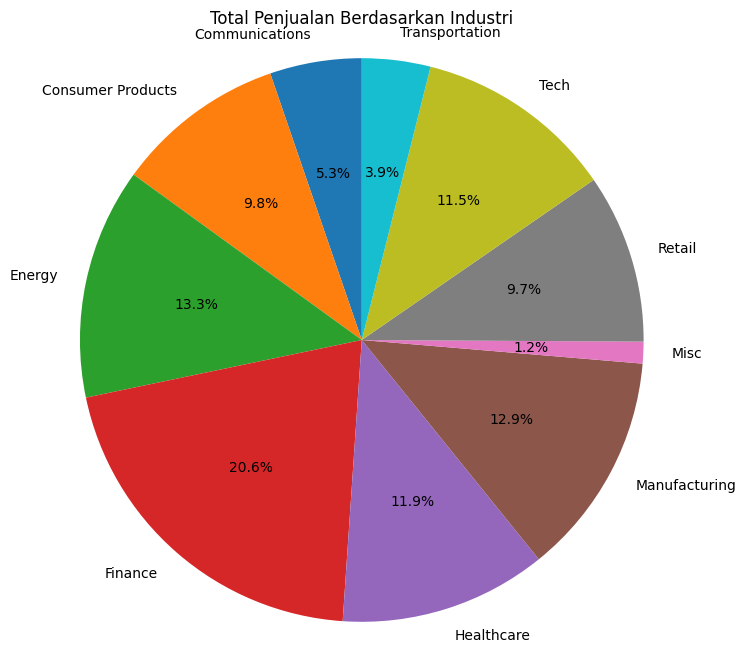

In [ ]:
# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(industry_sales, labels=industry_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Penjualan Berdasarkan Industri')
plt.axis('equal')
plt.show()

Dari seluruh sektor industri yang berkontribusi pada penjualan, kita urutkan berdasarkan tiga terbesar dan terkecil. Dengan demikian, kita dapat fokus pada sektor-sektor dengan potensi pertumbuhan terbesar dan mengidentifikasi sektor-sektor yang membutuhkan perhatian lebih.

Tiga sektor industri yang menyumbang penjualan terbesar.

In [ ]:
top_3_industry_sales = data.groupby(['Industry'])['Sales'].sum().sort_values(ascending=False).head(3)
top_3_industry_sales

,Sales
Industry,
Finance,474150.4844
Energy,304644.1409
Manufacturing,295192.3812


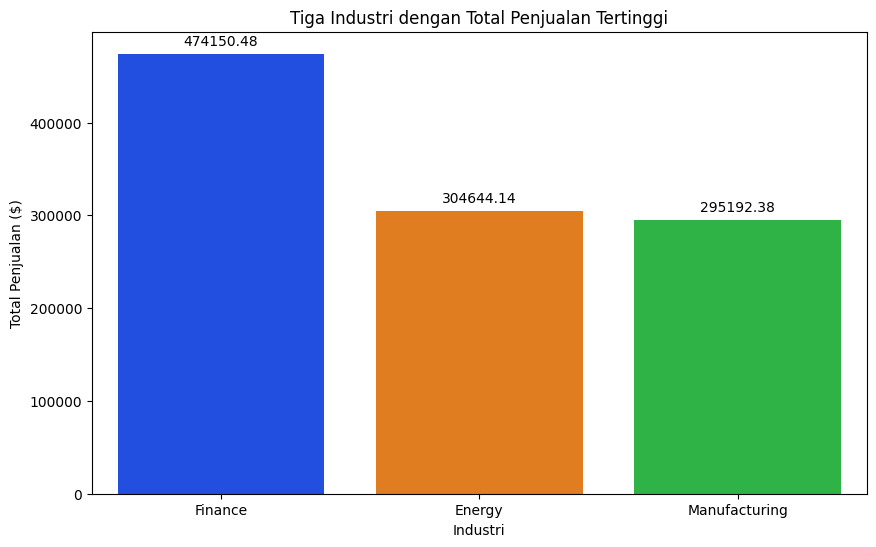

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_3_industry_sales.index, y=top_3_industry_sales.values, palette='bright')
plt.title('Tiga Industri dengan Total Penjualan Tertinggi')
plt.xlabel('Industri')
plt.ylabel('Total Penjualan ($)')

# Menampilkan nominal di atas bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

Tiga sektor industri yang menyumbang penjualan terkecil.

In [ ]:
bottom_3_industry_sales = data.groupby(['Industry'])['Sales'].sum().sort_values(ascending=True).head(3)
bottom_3_industry_sales

,Sales
Industry,
Misc,28591.7596
Transportation,90191.3276
Communications,120962.2365


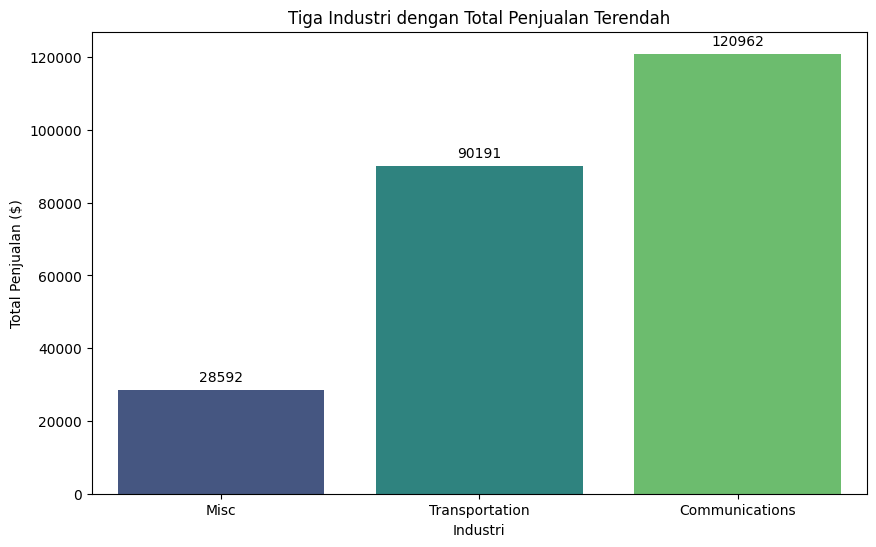

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bottom_3_industry_sales.index, y=bottom_3_industry_sales.values, palette='viridis')
plt.xlabel('Industri')
plt.ylabel('Total Penjualan ($)')
plt.title('Tiga Industri dengan Total Penjualan Terendah')

# Menampilkan nominal di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

Berdasarkan analisis data, diperoleh beberapa temuan penting:

1.   Industri `Finance` memiliki penetrasi produk SaaS tertinggi, diikuti oleh industri `Energi` dan `Manufaktur`.
2.   Kemampuan SaaS dalam mengintegrasikan data, menjaga keamanan, dan memberikan skalabilitas menjadikannya solusi yang ideal untuk sektor `Finance`.
3.   Sektor lainnya atau `Misc` mencatat volume penjualan terendah, disusul oleh sektor `Transportation` dan `Communications`.
4.   Rendahnya penetrasi pasar industri `Transportasi` dapat dikaitkan dengan keterbatasan infrastruktur dan kompleksitas birokrasi yang berlaku.
5.   Dibutuhkan pendekatan strategis yang efektif untuk penetrasi pasar pada sektor industri dengan birokrasi yang kompleks.



**Segmentasi Jenis Customer**

Analisis ini menghasilkan data total penjualan untuk masing-masing jenis `Customer`.  Data ini akan menjadi dasar untuk membandingkan perilaku pembelian antar segmen pelanggan.

In [ ]:
# Group by 'Segment' dan total 'Sales'
segment_sales = data.groupby('Segment')['Sales'].sum().sort_index()

# Tampilkan tabel
segment_sales

,Sales
Segment,
Enterprise,4.296531e+05
SMB,1.161401e+06
Strategic,7.061464e+05


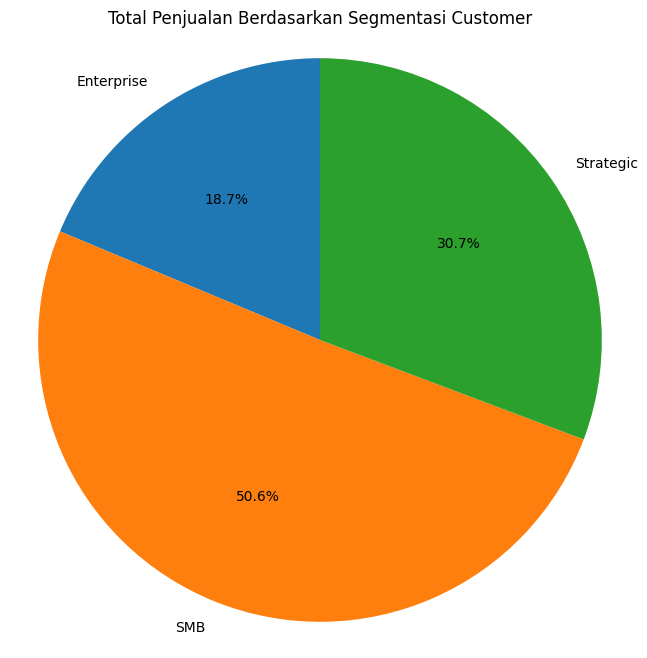

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Penjualan Berdasarkan Segmentasi Customer')
plt.axis('equal')
plt.show()

Analisis segmentasi pelanggan menghasilkan temuan-temuan sebagai berikut:


1.   Segmen *Small Medium Business* atau `SMB` merupakan kontributor terbesar bagi pendapatan produk SaaS, menyumbang sekitar 50% dari total penjualan, diikuti oleh segmen `Strategic` dan `Enterprise`.
2.   Dengan biaya yang terjangkau, kemudahan penggunaan, dan fleksibilitas, produk SaaS memungkinkan `SMB` untuk bersaing dengan bisnis yang lebih besar dan mencapai pertumbuhan yang lebih cepat.
3.   Kompleksitas sistem yang ada dan tuntutan akan kontrol yang lebih besar di segmen `Enterprise` menjadi tantangan tersendiri dalam meningkatkan penjualan yang saat ini hanya menyumbang kurang dari seperlima dari total penjualan.



**Segmentasi Pelanggan**

Hasil analisis ini akan menunjukkan pelanggan-pelanggan kunci yang memberikan kontribusi terbesar terhadap penjualan. Dengan demikian, kita dapat memberikan apresiasi yang sesuai dan menyusun program pemasaran yang lebih tertarget.

In [ ]:
# Group by 'Contact Name', 'Country', dan total 'Sales'
grouped_data = data.groupby(['Contact Name', 'Country'])['Sales'].sum().reset_index()

# Sort by 'Sales' dengan urutan menurun, ambil 3 teratas
top_3_sales = grouped_data.sort_values('Sales', ascending=False).head(3)

# Tampilkan tabel
top_3_sales

,Contact Name,Country,Sales
1046,Diane Murray,Germany,23661.228
2978,Nicholas Skinner,India,18336.740
613,Cameron MacLeod,Canada,14052.480


Pelanggan atas nama Diane Murray asal Jerman berhasil meraih posisi puncak sebagai pelanggan dengan kontribusi pembelian terbesar, dengan total transaksi mencapai $23.662.

# **Analisis Penjualan Produk**

Melalui analisis penjualan produk, kita dapat memperoleh wawasan yang mendalam mengenai dinamika pasar, perilaku konsumen, dan kinerja produk, sehingga memungkinkan pengambilan keputusan bisnis yang lebih efektif.

Analisis penjualan produk dikategorikan menjadi beberapa kelompok sebagai berikut:
1.   Tren penjualan produk
2.   Jumlah produk yang berhasil dijual
3.   Performa penjualan produk ($)

**Tren Penjualan Produk**

Data tren penjualan memungkinkan kita untuk menghitung pertumbuhan penjualan perusahaan dan melakukan analisis mendalam terhadap kinerja penjualan.

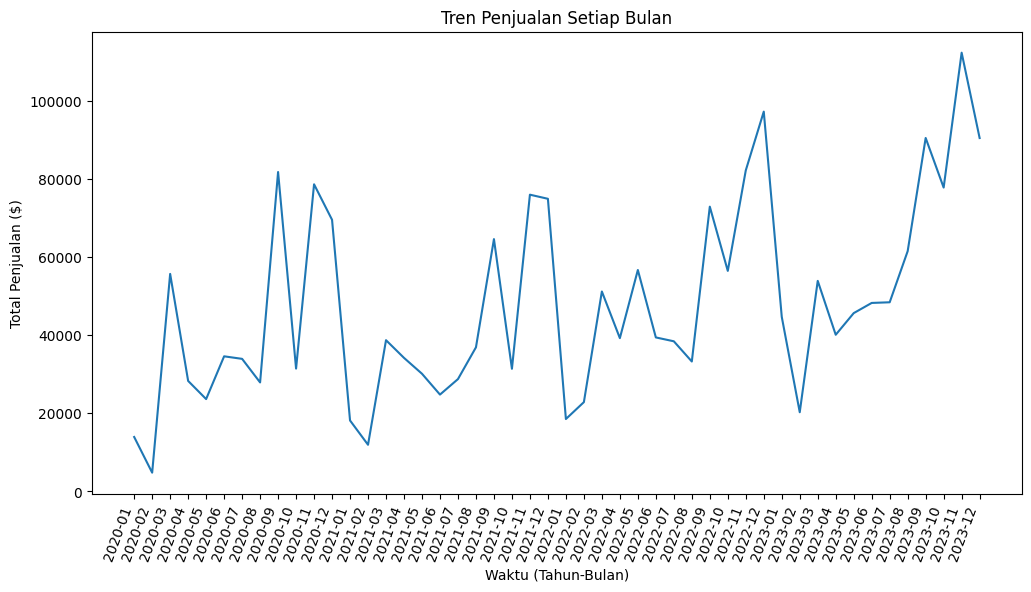

In [ ]:
# Group by 'Tahun_Bulan' dan total 'Sales'
sales_trend = data.groupby('Tahun_Bulan')['Sales'].sum()

# Tampilkan line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values)
plt.xlabel('Waktu (Tahun-Bulan)')
plt.ylabel('Total Penjualan ($)')
plt.title('Tren Penjualan Setiap Bulan')
plt.xticks(rotation=70, ha='right')
plt.show()

Tren penjualan yang diamati menghasilkan beberapa temuan yang patut diperhatikan, di antaranya adalah sebagai berikut:

1.   Tren penjualan produk SaaS mengalami kenaikan dari awal tahun 2020 menuju akhir tahun 2023. Hal ini menunjukkan peningkatan adopsi solusi berbasis cloud di berbagai sektor industri.
2.   Terdapat kenaikan penjualan secara konsisten pada kuartal ketiga setiap tahunnya. Fenomena ini diduga kuat berkaitan dengan aktivitas penutupan buku dan upaya optimalisasi perusahaan menjelang akhir tahun fiskal.
3.   Penurunan penjualan pada kuartal pertama dapat dikaitkan dengan siklus anggaran tahunan perusahaan, di mana alokasi dana untuk investasi dalam teknologi seperti software seringkali ditunda hingga kuartal-kuartal berikutnya.



**Jumlah Produk yang Berhasil Dijual**

In [ ]:
product_quantity = data.groupby('Product')['Quantity'].sum().sort_index()

# Tampilkan tabel
product_quantity

,Quantity
Product,
Alchemy,234
Big Ol Database,440
ChatBot Plugin,3000
ContactMatcher,7215
Data Smasher,2976
FinanceHub,3756
Marketing Suite,868
Marketing Suite - Gold,3158
OneView,1729


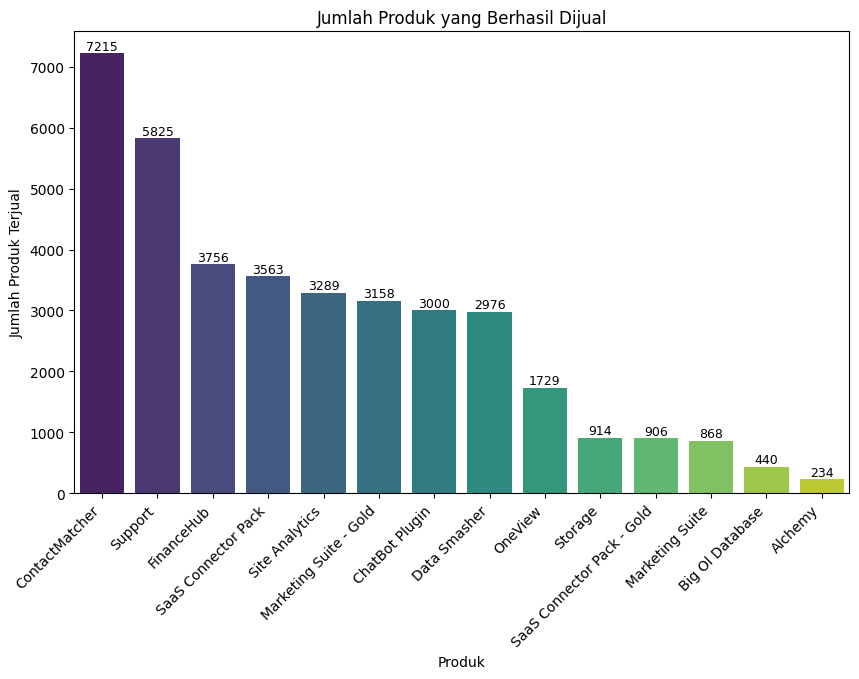

In [4]:
# Group by 'Product' dan total 'Quantity'
product_quantity = data.groupby(['Product'])['Quantity'].sum().sort_values(ascending=False)

# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=product_quantity.index, y=product_quantity.values, palette='viridis')
plt.xlabel('Produk')
plt.ylabel('Jumlah Produk Terjual')
plt.title('Jumlah Produk yang Berhasil Dijual')
plt.xticks(rotation=45, ha='right')

# Menambahkan nominal di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Kita akan melakukan pengurutan produk berdasarkan kuantitas penjualan, baik tiga produk dengan kuantitas penjualan tertinggi maupun terendah.

Tiga Produk yang Paling Banyak Dibeli

In [ ]:
# Tiga produk yang paling banyak dibeli
top_3_product_quantity = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(3)

# Tampilkan tabel
top_3_product_quantity

,Quantity
Product,
ContactMatcher,7215
Support,5825
FinanceHub,3756


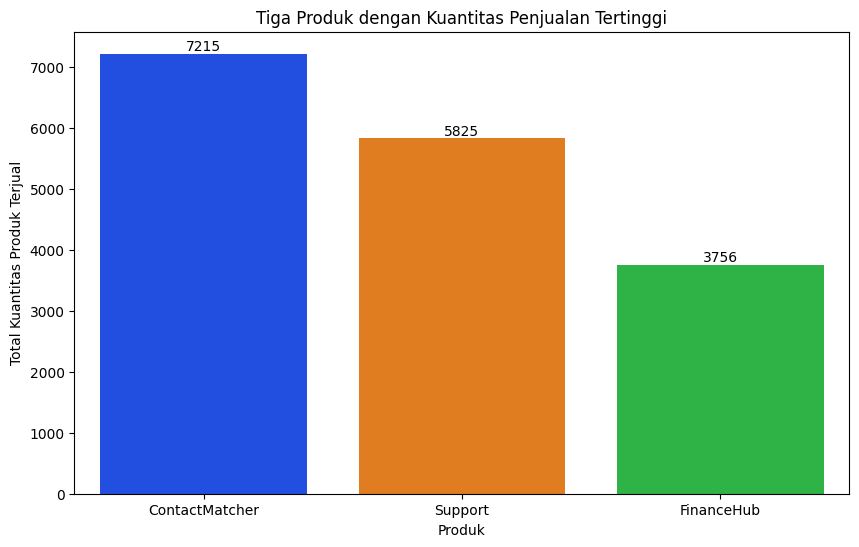

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_3_product_quantity.index, y=top_3_product_quantity.values, palette='bright')
plt.xlabel('Produk')
plt.ylabel('Total Kuantitas Produk Terjual')
plt.title('Tiga Produk dengan Kuantitas Penjualan Tertinggi')

# Menampilkan nominal di atas bar chart
for bar in bars.patches:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
            ha='center', va='bottom')

plt.show()

Tiga Produk yang Paling Sedikit Dibeli

In [ ]:
# Tiga produk yang paling sedikit dibeli
bottom_3_product_quantity = data.groupby('Product')['Quantity'].sum().sort_values(ascending=True).head(3)

# Tampilkan tabel
bottom_3_product_quantity

,Quantity
Product,
Alchemy,234
Big Ol Database,440
Marketing Suite,868


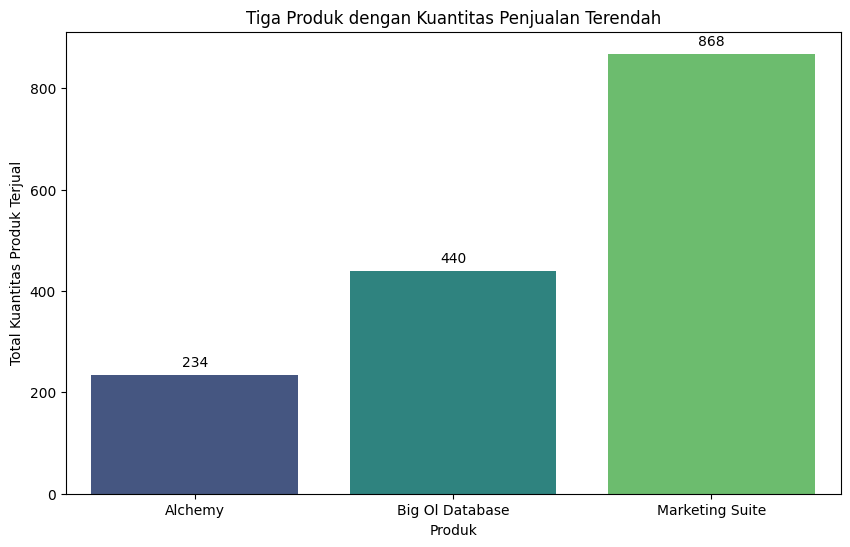

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bottom_3_product_quantity.index, y=bottom_3_product_quantity.values, palette='viridis')
plt.xlabel('Produk')
plt.ylabel('Total Kuantitas Produk Terjual')
plt.title('Tiga Produk dengan Kuantitas Penjualan Terendah')

# Menambahkan nominal di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

Analisis terhadap volume penjualan produk menunjukkan informasi sebagai berikut:

1.   Produk `ContactMatcher` mendominasi penjualan produk SaaS. Diikuti oleh `Support` dan `Finance Hub`.
2.   Hasil ini menunjukkan adanya kebutuhan yang signifikan akan perangkat lunak yang dapat mengoptimalkan proses pengelolaan data kontak, serta menyediakan fitur analisis data keuangan yang komprehensif.
3.   Terdapat kesenjangan yang signifikan antara kinerja penjualan produk `Alchemy` dengan produk SaaS lainnya.
4.   Hal ini mengindikasikan adanya kebutuhan untuk melakukan evaluasi lebih lanjut terhadap strategi pemasaran dan pengembangan produk untuk meningkatkan daya tarik produk `Alchemy` di pasar.

**Performa Penjualan Produk ($)**

In [ ]:
product_sales = data.groupby('Product')['Sales'].sum().sort_index()

product_sales

,Sales
Product,
Alchemy,149528.0300
Big Ol Database,189238.6310
ChatBot Plugin,27118.7920
ContactMatcher,410378.2650
Data Smasher,167380.3180
FinanceHub,340935.4150
Marketing Suite,114879.9963
Marketing Suite - Gold,223843.6080
OneView,107532.1610


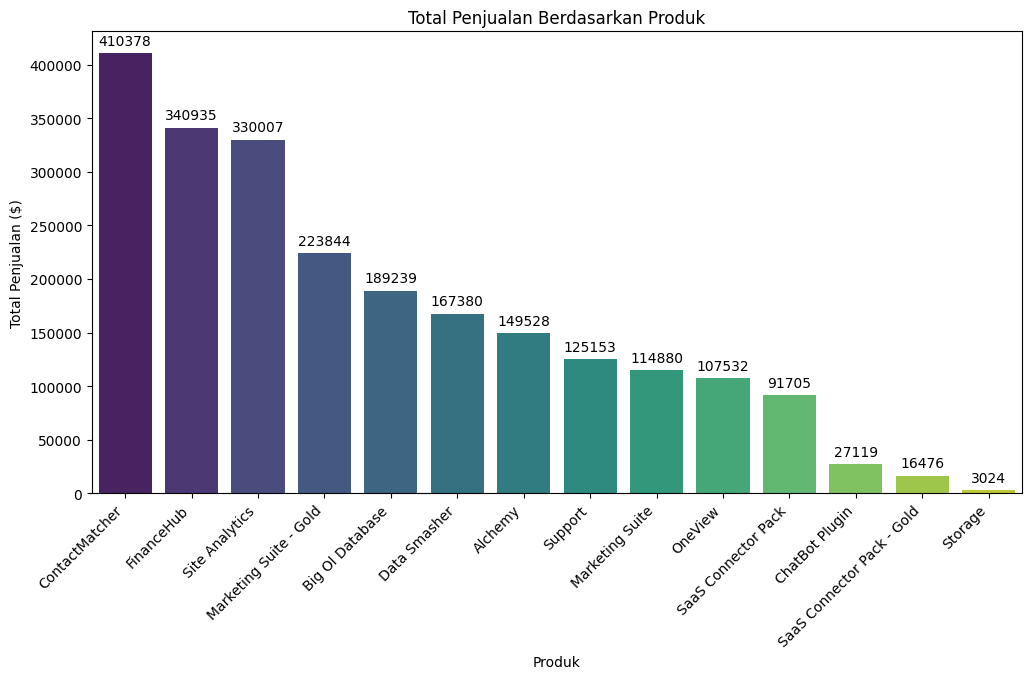

In [ ]:
# Group by 'Product' dan total 'Sales', urutkan menurun
product_sales = data.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Tampilkan bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan ($)')
plt.title('Total Penjualan Berdasarkan Produk')

# Menampilkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

Kita akan melakukan pengurutan produk berdasarkan volume penjualan, baik tiga produk dengan penjualan tertinggi maupun terendah. Analisis ini akan membantu kita mengidentifikasi produk unggulan yang perlu terus dikembangkan dan produk yang perlu dievaluasi kembali.

Tiga Produk dengan Penjualan Tertinggi

In [ ]:
# Group by 'Product' dan 'Sales', lalu urutkan berdasarkan 'Sales', pilih 3 teratas
top_3_product_sales = data.groupby(['Product'])['Sales'].sum().sort_values(ascending=False).head(3)

# Tampilkan tabel
top_3_product_sales

,Sales
Product,
ContactMatcher,410378.265
FinanceHub,340935.415
Site Analytics,330007.054


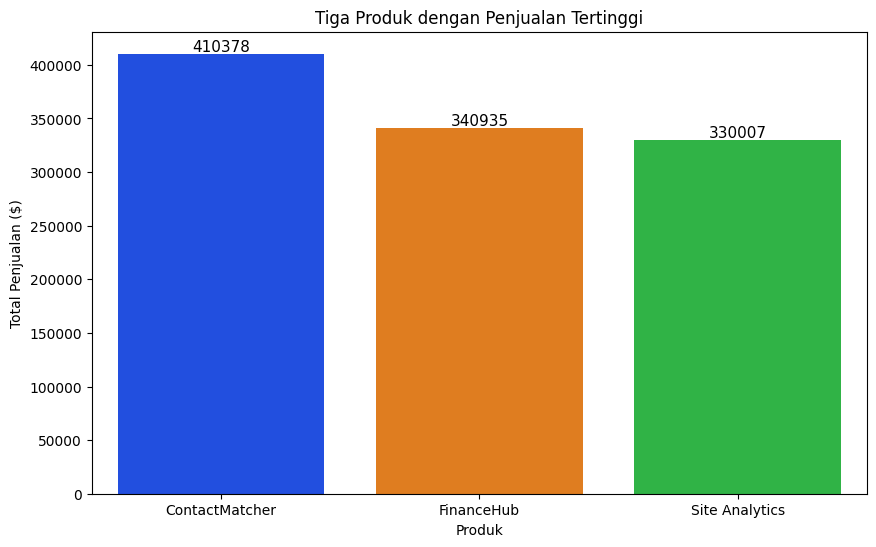

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_3_product_sales.index, y=top_3_product_sales.values, palette='bright')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan ($)')
plt.title('Tiga Produk dengan Penjualan Tertinggi')

# Menambahkan nominal di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Tiga Produk dengan Penjualan Terendah

In [ ]:
# Group by 'Product' dan 'Sales', lalu urutkan berdasarkan 'Sales', pilih 3 terendah
bottom_3_product_sales = data.groupby(['Product'])['Sales'].sum().sort_values(ascending=True).head(3)

# Tampilkan tabel
bottom_3_product_sales

,Sales
Product,
Storage,3024.280
SaaS Connector Pack - Gold,16476.402
ChatBot Plugin,27118.792


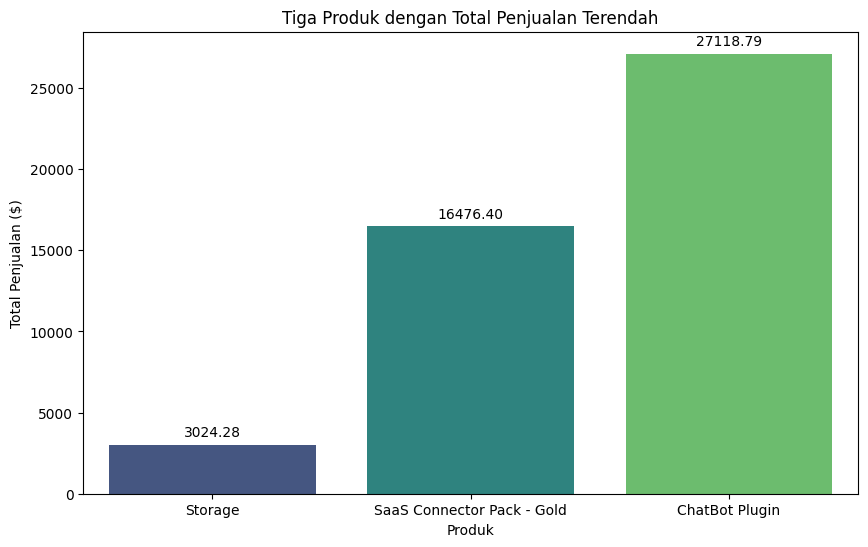

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bottom_3_product_sales.index, y=bottom_3_product_sales.values, palette='viridis')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan ($)')
plt.title('Tiga Produk dengan Total Penjualan Terendah')

# Menambahkan nominal di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

Berdasarkan analisis komparatif terhadap produk dengan penjualan tertinggi dan terendah, diperoleh temuan sebagai berikut:


1.   Produk `ContactMatcher` secara konsisten mendominasi pangsa pasar produk SaaS. Diikuti oleh `FinanceHub` dan `Site Analytics`.
2.   Temuan ini konsisten dengan data penjualan yang menunjukkan bahwa produk `ContactMatcher` memiliki volume penjualan tertinggi.
3.   Meskipun volume penjualan produk `Storage` tidaklah sedikit, namun produk ini memiliki kontribusi penjualan terendah dengan total penjualan sebesar $3.024. Rendahnya harga jual produk menjadi salah satu faktor yang berkontribusi pada hasil penjualan ini.
4.   Hal ini mengindikasikan adanya kebutuhan untuk melakukan evaluasi lebih lanjut terhadap strategi pemasaran dan penyesuaian harga produk untuk meningkatkan daya tarik dan penjualan produk `Storage` di pasar.



# **Analisis Profit**

Analisis ini ditujukan  untuk memahami, mengukur, dan mengevaluasi kinerja keuangan suatu perusahaan atau produk tertentu. Dengan melakukan analisa profit, perusahaan dapat dasar untuk membuat perencanaan strategis, seperti menentukan target penjualan, menetapkan harga jual, dan mengalokasikan sumber daya.

Analisis profit dikategorikan menjadi beberapa kelompok sebagai berikut:
1.   Profit yang dihasilkan setiap produk
2.   Tiga produk dengan profit terbesar
3.   Tiga produk dengan profit terkecil

**Profit yang Dihasilkan Setiap Produk**

In [ ]:
# Group by 'Product' dan total 'Profit', lalu urutkan
product_profit = data.groupby('Product')['Profit'].sum().sort_index()

# Tampilkan tabel
product_profit

,Profit
Product,
Alchemy,55617.8249
Big Ol Database,3384.7569
ChatBot Plugin,6527.7870
ContactMatcher,12496.2822
Data Smasher,41936.6357
FinanceHub,32136.4203
Marketing Suite,-3472.5560
Marketing Suite - Gold,21278.8264
OneView,18138.0054


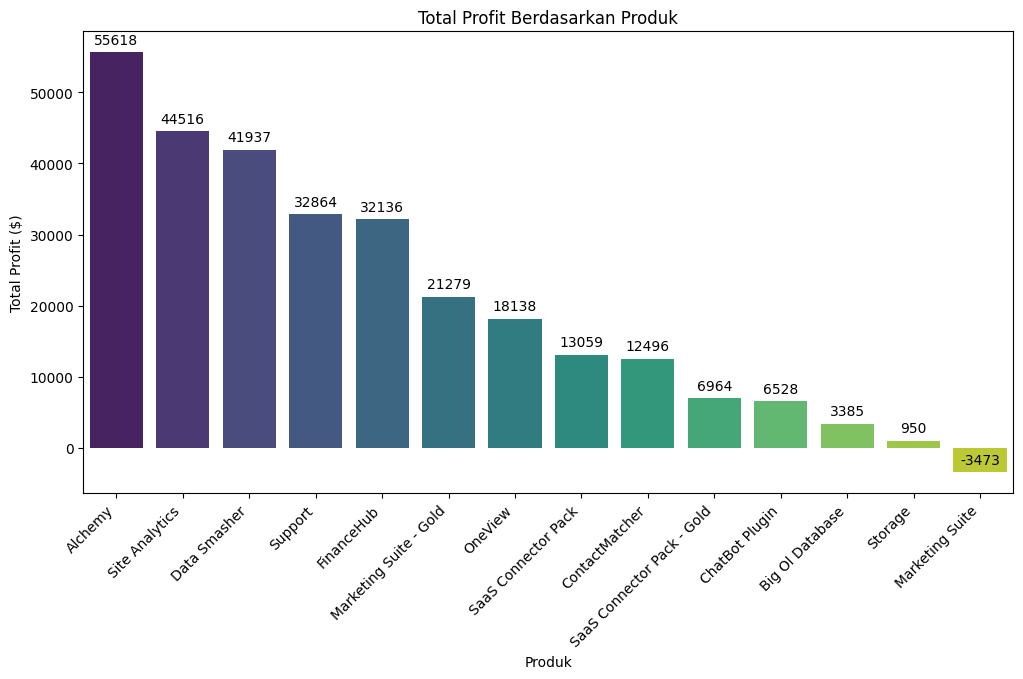

In [ ]:
# Group by 'Product' dan total 'Profit', lalu urutkan menurun
product_profit = data.groupby('Product')['Profit'].sum().sort_values(ascending=False)

# Tampilkan bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=product_profit.index, y=product_profit.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Produk')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit Berdasarkan Produk')

# Menampilkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

**Tiga Produk dengan Profit Terbesar**

In [ ]:
# Group by 'Product' dan 'Profit', pilih 3 teratas
top_3_product_profit = data.groupby(['Product'])['Profit'].sum().sort_values(ascending=False).head(3)

# Tampilkan tabel
top_3_product_profit

,Profit
Product,
Alchemy,55617.8249
Site Analytics,44515.7306
Data Smasher,41936.6357


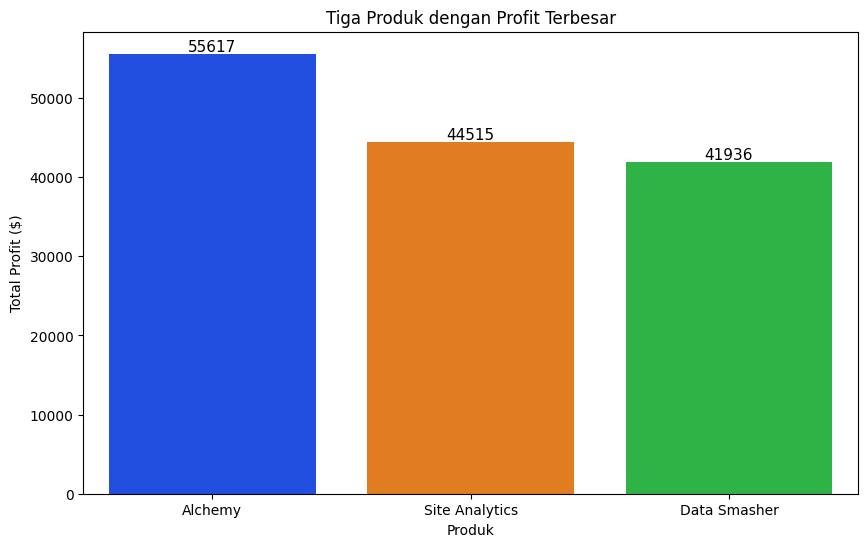

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_3_product_profit.index, y=top_3_product_profit.values, palette='bright')
plt.xlabel('Produk')
plt.ylabel('Total Profit ($)')
plt.title('Tiga Produk dengan Profit Terbesar')

# Menambahkan nominal di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

**Tiga Produk dengan Profit Terkecil**

In [ ]:
# Group by 'Product' dan 'Profit', pilih 3 terbawah
bottom_3_product_profit = data.groupby(['Product'])['Profit'].sum().sort_values(ascending=True).head(3)

# Tampilkan tabel
bottom_3_product_profit

,Profit
Product,
Marketing Suite,-3472.5560
Storage,949.5182
Big Ol Database,3384.7569


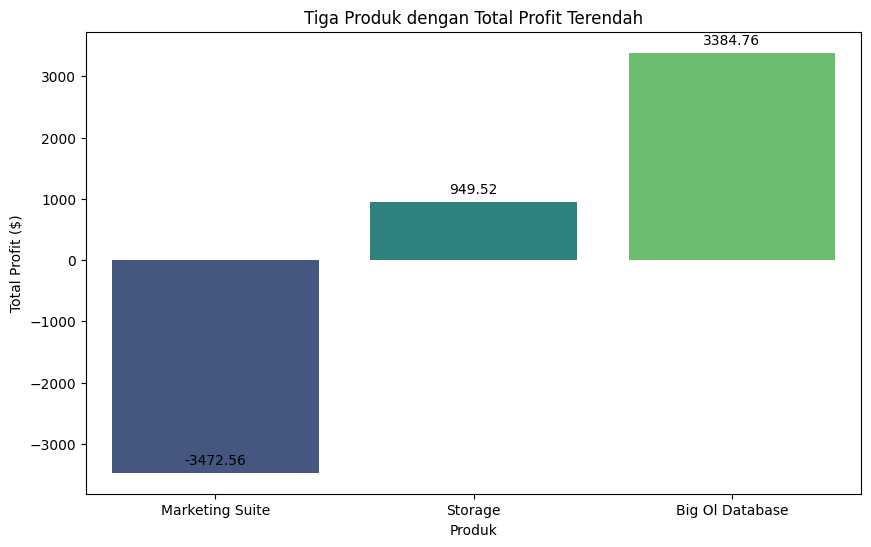

In [ ]:
# Tampilkan bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bottom_3_product_profit.index, y=bottom_3_product_profit.values, palette='viridis')
plt.xlabel('Produk')
plt.ylabel('Total Profit ($)')
plt.title('Tiga Produk dengan Total Profit Terendah')

# Menambahkan nominal di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

Berdasarkan analisis profitabilitas yang telah dilakukan, dapat ditarik beberapa kesimpulan sebagai berikut:

1.   Produk `Alchemy` memberikan kontribusi terbesar terhadap total keuntungan, diikuti oleh `Site Analytic` dan `Data Smasher`. Hal ini menunjukkan bahwa strategi pemasaran yang telah terapkan untuk produk `Alchemy` sangat efektif.
2.   Penjualan produk `Marketing Suite` mengalami defisit sebesar $3.472,56. Salah satu kontributor utama defisit ini adalah kebijakan pemberian diskon yang terlalu agresif.
3.   Dibutuhkan kajian ulang terhadap kebijakan pemberian diskon untuk produk `Marketing Suite`. Analisis terbaru menunjukkan bahwa kebijakan diskon saat ini tidak efektif dan justru mengakibatkan kerugian.



# **Analisis Korelasi**

Analisis ini menerapkan uji korelasi Spearman untuk mengukur kekuatan dan arah hubungan antara dua variabel ordinal atau data numerik yang tidak berdistribusi normal. Metode Spearman dipilih karena memiliki keunggulan dalam menganalisis data yang tidak memenuhi asumsi normalitas yang seringkali menjadi syarat dalam uji korelasi parametrik.

Selain itu, Spearman juga lebih *robust* terhadap pengaruh *outlier*, sehingga hasil analisis menjadi lebih reliabel.

https://klc2.kemenkeu.go.id/kms/knowledge/korelasi-spearman-2038c876/detail/

https://etd.repository.ugm.ac.id/penelitian/detail/200918

**Korelasi Antara Profit dan Sales**

In [ ]:
correlation_profit_sales = data['Profit'].corr(data['Sales'], method='spearman')
print(f"Korelasi antara Profit dan Sales (Spearman): {correlation_profit_sales}")

Korelasi antara Profit dan Sales (Spearman): 0.5184066611400607


Nilai Spearman 0.52 menunjukkan adanya hubungan yang cukup kuat antara `Profit` dan `Sales`.

Peningkatan `Sales` secara umum akan berbanding lurus dengan peningkatan `Profit`

Perusahaan dapat memanfaatkan informasi ini untuk membuat keputusan bisnis yang lebih baik, seperti mengalokasikan sumber daya untuk meningkatkan `Sales` dan mengoptimalkan struktur biaya.

**Korelasi Antara Profit dan Discount**

In [ ]:
correlation_profit_discount = data['Profit'].corr(data['Discount'], method='spearman')
print(f"Korelasi antara Profit dan Discount (Spearman): {correlation_profit_discount}")

Korelasi antara Profit dan Discount (Spearman): -0.5433501822306213


Nilai Spearman -0.54 menunjukkan adanya korelasi negatif yang moderat antara profit dan diskon.

Artinya, ketika nilai `Discount` diberikan semakin besar, maka nilai `Profit` cenderung menurun. Sebaliknya, jika `Discount` diberikan lebih sedikit atau bahkan tidak ada, maka `Profit` cenderung meningkat.

Perusahaan perlu berhati-hati dalam memberikan `Discount`, karena pemberian `Discount` yang terlalu besar dapat mengurangi profitabilitas. Namun, `Discount` juga dapat menjadi alat yang efektif untuk meningkatkan penjualan dalam kondisi tertentu. Oleh karena itu, perusahaan perlu melakukan analisis yang lebih mendalam untuk menentukan strategi pemberian diskon yang optimal.

**Korelasi Antara Sales dan Discount**

In [ ]:
correlation_sales_discount = data['Sales'].corr(data['Discount'], method='spearman')
print(f"Korelasi antara Sales dan Discount (Spearman): {correlation_sales_discount}")

Korelasi antara Sales dan Discount (Spearman): -0.05696855074893832


Nilai Spearman -0.057 menunjukkan adanya korelasi negatif yang sangat lemah antara `Sales` dan `Discount`.

Ini berarti bahwa ketika nilai `Discount` diberikan, tidak ada hubungan yang jelas dan signifikan terhadap peningkatan `Sales`. Dengan kata lain, pemberian `Discount` pada umumnya tidak memberikan pengaruh yang berarti terhadap peningkatan jumlah `Sales`.

Strategi `Discount` yang diterapkan mungkin tidak efektif dalam meningkatkan `Sales`. Perusahaan perlu mengevaluasi kembali strategi pemasarannya dan mencari cara lain untuk menarik minat konsumen.

# **Kesimpulan**

**Analisis Segmentasi Penjualan**

1.   Kontribusi penjualan terbesar berasal dari `United States`, sementara penjualan di `Qatar` masih memiliki potensi untuk ditingkatkan.
2.   Sektor industri `Finance` merupakan kontributor utama dalam pembelian produk SaaS, sementara industri lainnya atau `Misc` dan `Transportation` memerlukan penyesuaian strategi penjualan yang lebih efektif.
3.   Segmen *Small Medium Business* atau `SMB` menjadi pendorong utama pendapatan produk SaaS, sementara segmen perusahaan besar atau `Enterprise` masih menjadi tantangan dalam upaya meningkatkan penjualan.
4.   Berdasarkan data penjualan, Nyonya `Diane Murray` dari Jerman berhasil meraih posisi puncak sebagai pelanggan dengan kontribusi pembelian terbesar.



**Analisis Penjualan Produk**

1.   Analisis data penjualan menunjukkan peningkatan signifikan pada produk SaaS dari tahun 2020 hingga 2023. Tren musiman yang terlihat, dengan puncak penjualan di kuartal ketiga dan penurunan di kuartal pertama, mengindikasikan pengaruh siklus anggaran tahunan perusahaan.
2.   Produk `ContactMatcher` mendominasi pangsa pasar produk SaaS, sementara produk `Alchemy` menunjukkan kinerja penjualan yang kurang memuaskan dibandingkan produk lainnya.
3.   Meskipun volume kuantitas penjualan produk `Storage` cukup signifikan, namun produk ini memiliki total pendapatan terkecil di antara produk SaaS lainnya.



**Analisis Profit**

1.   Produk `Alchemy` merupakan produk unggulan. Strategi pemasaran yang diterapkan pada produk `Alchemy` terbukti sangat efektif, terbukti dari kontribusi terbesarnya terhadap total keuntungan perusahaan.
2.   Produk `Marketing Suite` mengalami kendala. Kebijakan pemberian diskon yang terlalu agresif menjadi penyebab utama defisit penjualan pada produk `Marketing Suite`. Kebijakan ini dinilai tidak efektif dan justru merugikan perusahaan.



**Analisis Korelasi**

1.   Hubungan yang kuat antara `Sales` dan `Profit` menunjukkan bahwa peningkatan penjualan adalah salah satu cara efektif untuk meningkatkan profitabilitas perusahaan.
2.   Adanya hubungan negatif antara pemberian `Discount` dan `Profit` perusahaan. Semakin besar diskon yang diberikan, semakin kecil keuntungan yang diperoleh.
3.   Tidak ada hubungan yang signifikan antara pemberian `Discount` dan peningkatan `Sales`. Artinya, saat perusahaan memberikan diskon, penjualan tidak selalu meningkat secara signifikan



# **Rekomendasi**

**Penyesuaian Produk untuk Penetrasi Global**

Agar produk atau layanan diterima dengan baik di negara dengan perkembangan teknologi yang berbeda, kita perlu menyesuaikan produk dengan kondisi lokal. Dengan memastikan kualitas dan relevansi produk pada negara tujuan, kita dapat memaksimalkan peluang keberhasilan dan mendapatkan kepercayaan pelanggan di pasar internasional.

https://maciejduraj-75226.medium.com/launching-saas-onto-a-different-region-of-the-world-can-be-tricky-3c8b5ae109f

**Penerapan Program Loyalty Benefit dan Referal**

Melalui program loyalitas, kita ingin membangun hubungan jangka panjang dengan pelanggan. Dengan memberikan penghargaan yang sesuai, kita berharap pelanggan akan merasa lebih terikat dengan merek kita dan enggan beralih ke kompetitor.

Program referal dapat mendorong pelanggan yang puas untuk merekomendasikan bisnis kita kepada orang lain dengan menawarkan hadiah sebagai imbalan. Dengan cara ini, pelanggan yang puas dapat menjadi promotor merek. Program referal juga dapat digunakan untuk menarik pengguna baru dengan menawarkan insentif yang menarik.

https://userpilot.com/blog/customer-loyalty/

**Evaluasi Harga Produk**

Perlu dilakukan analisis mendalam terhadap harga produk Saas, khususnya produk `Storage`, untuk menemukan titik harga optimal guna dapat meningkatkan pendapatan.

**Evaluasi Pemberian Diskon**

Sebagai upaya untuk menjaga stabilitas harga, pemberian diskon akan diberikan secara selektif kepada pelanggan yang melakukan pembayaran penuh di muka untuk pembelian dalam jumlah besar.

https://www.kalungi.com/blog/saas-pricing-discounts

**Alokasi Dana untuk Pengembangan Produk**

Diperlukan alokasi anggaran khusus untuk pengembangan produk dan kegiatan pemasaran, terutama untuk produk dengan volume penjualan yang rendah seperti `Alchemy` dan `Big Ol Database`.